In [2]:
import numpy as np
import sys
sys.path.append('/eagle/fthmc/run')
from Scaling_FT_HMC.utils.func import auto_from_chi
from lametlat.utils.plot_settings import *

### L32 b6

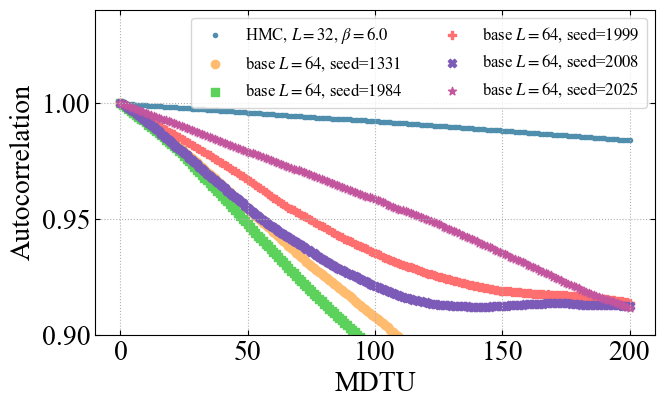

In [3]:
hmc_L32_b6_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta6.0.csv')

fthmc_base_L32_b6_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L32_beta6.0_base_train_b4.0_L64_1331.csv')
fthmc_base_L32_b6_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L32_beta6.0_base_train_b4.0_L64_1984.csv')
fthmc_base_L32_b6_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L32_beta6.0_base_train_b4.0_L64_1999.csv')
fthmc_base_L32_b6_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L32_beta6.0_base_train_b4.0_L64_2008.csv')
fthmc_base_L32_b6_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L32_beta6.0_base_train_b4.0_L64_2025.csv')

max_lag = 200
beta = 6.0
volume = 32**2

hmc_L32_b6_auto = auto_from_chi(hmc_L32_b6_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_base_L32_b6_auto_1331 = auto_from_chi(fthmc_base_L32_b6_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L32_b6_auto_1984 = auto_from_chi(fthmc_base_L32_b6_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L32_b6_auto_1999 = auto_from_chi(fthmc_base_L32_b6_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L32_b6_auto_2008 = auto_from_chi(fthmc_base_L32_b6_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L32_b6_auto_2025 = auto_from_chi(fthmc_base_L32_b6_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b6_auto)), hmc_L32_b6_auto, label='HMC, $L=32$, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_1331)), fthmc_base_L32_b6_auto_1331, label='base $L=64$, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_1984)), fthmc_base_L32_b6_auto_1984, label='base $L=64$, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_1999)), fthmc_base_L32_b6_auto_1999, label='base $L=64$, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_2008)), fthmc_base_L32_b6_auto_2008, label='base $L=64$, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_2025)), fthmc_base_L32_b6_auto_2025, label='base $L=64$, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0.9, 1.04)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/base_train_b4_L64_autocorrelation_L32_b6.pdf', transparent=True)
plt.show()


In [4]:
idx = 16

gamma_hmc = 1 / (1 - hmc_L32_b6_auto[idx])

gamma_fthmc_1331 = 1 / (1 - fthmc_base_L32_b6_auto_1331[idx])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L32_b6_auto_1984[idx])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L32_b6_auto_1999[idx])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L32_b6_auto_2008[idx])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L32_b6_auto_2025[idx])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b6_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])
gamma_ratio_L32_b6_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])


print(f">>> gamma ratio ({idx})")
print(f"gamma ratio ({idx}) for L32 b6: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2025}")
print(f"mean({idx}) for L32 b6: {gamma_ratio_L32_b6_mean}")
print(f"std({idx}) for L32 b6: {gamma_ratio_L32_b6_std}")

deltaQ_hmc = [ abs(hmc_L32_b6_topo[i] - hmc_L32_b6_topo[i-1]) for i in range(1, len(hmc_L32_b6_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L32_b6_topo_1331[i] - fthmc_base_L32_b6_topo_1331[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L32_b6_topo_1984[i] - fthmc_base_L32_b6_topo_1984[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L32_b6_topo_1999[i] - fthmc_base_L32_b6_topo_1999[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L32_b6_topo_2008[i] - fthmc_base_L32_b6_topo_2008[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_2008))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L32_b6_topo_2025[i] - fthmc_base_L32_b6_topo_2025[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_2025))]

deltaQ_hmc_L32_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b6_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b6_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ ratio for HMC L32 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b6: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_mean / deltaQ_hmc_L32_b6_mean}")
print(f"std(deltaQ) ratio for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_std / deltaQ_hmc_L32_b6_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b6: 7.968749999999978, 8.5, 6.468749999999979, 8.125000000000016, 4.187499999999992
mean(16) for L32 b6: 7.049999999999993
std(16) for L32 b6: 1.5895901594436261

>>> deltaQ
deltaQ ratio for HMC L32 b6: 0.002686202686202686
deltaQ for FTHMC L32 b6: 0.006837606837606838, 0.009035409035409036, 0.006593406593406593, 0.007081807081807082, 0.005860805860805861
mean(deltaQ) ratio for FTHMC L32 b6: 2.6363636363636362
std(deltaQ) ratio for FTHMC L32 b6: 0.39417242524870555


### L64 b4

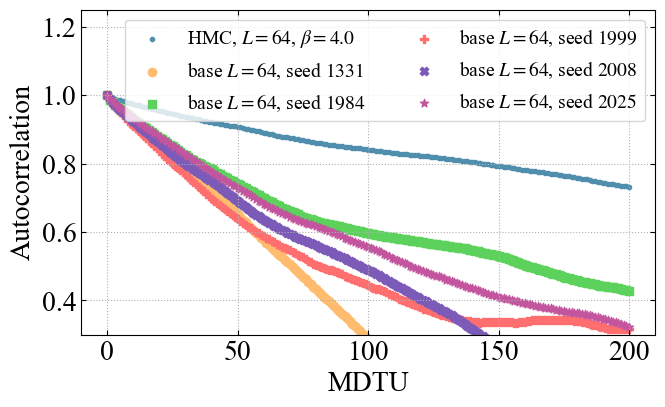

In [11]:
hmc_L64_b4_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L64_beta4.0.csv')

fthmc_base_L64_b4_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L64_beta4.0_base_train_b4.0_L64_1331.csv')
fthmc_base_L64_b4_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L64_beta4.0_base_train_b4.0_L64_1984.csv')
fthmc_base_L64_b4_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L64_beta4.0_base_train_b4.0_L64_1999.csv')
fthmc_base_L64_b4_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L64_beta4.0_base_train_b4.0_L64_2008.csv')
fthmc_base_L64_b4_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L64_beta4.0_base_train_b4.0_L64_2025.csv')

max_lag = 200
beta = 4.0
volume = 64**2

hmc_L64_b4_auto = auto_from_chi(hmc_L64_b4_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_base_L64_b4_auto_1331 = auto_from_chi(fthmc_base_L64_b4_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b4_auto_1984 = auto_from_chi(fthmc_base_L64_b4_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b4_auto_1999 = auto_from_chi(fthmc_base_L64_b4_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b4_auto_2008 = auto_from_chi(fthmc_base_L64_b4_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b4_auto_2025 = auto_from_chi(fthmc_base_L64_b4_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L64_b4_auto)), hmc_L64_b4_auto, label='HMC, $L=64$, $\\beta=4.0$', marker=marker_ls[0], color=color_ls[0])

ax.scatter(np.arange(len(fthmc_base_L64_b4_auto_1331)), fthmc_base_L64_b4_auto_1331, label='base $L=64$, seed $1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L64_b4_auto_1984)), fthmc_base_L64_b4_auto_1984, label='base $L=64$, seed $1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L64_b4_auto_1999)), fthmc_base_L64_b4_auto_1999, label='base $L=64$, seed $1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L64_b4_auto_2008)), fthmc_base_L64_b4_auto_2008, label='base $L=64$, seed $2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L64_b4_auto_2025)), fthmc_base_L64_b4_auto_2025, label='base $L=64$, seed $2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0.3, 1.25)
ax.legend(ncol=2, loc='upper right', fontsize=14)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/base_train_b4_L64_autocorrelation_L64_b4.pdf', transparent=True)
plt.show()


In [12]:
idx = 16

gamma_hmc = 1 / (1 - hmc_L64_b4_auto[idx])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L64_b4_auto_1331[idx])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L64_b4_auto_1984[idx])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L64_b4_auto_1999[idx])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L64_b4_auto_2008[idx])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L64_b4_auto_2025[idx])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L64_b4_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])
gamma_ratio_L64_b4_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])


print(f">>> gamma ratio ({idx})")
print(f"gamma ratio ({idx}) for L64 b4: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2025}")
print(f"mean({idx}) for L64 b4: {gamma_ratio_L64_b4_mean}")
print(f"std({idx}) for L64 b4: {gamma_ratio_L64_b4_std}")

deltaQ_hmc = [ abs(hmc_L64_b4_topo[i] - hmc_L64_b4_topo[i-1]) for i in range(1, len(hmc_L64_b4_topo))]

deltaQ_fthmc_1331 = [ abs(fthmc_base_L64_b4_topo_1331[i] - fthmc_base_L64_b4_topo_1331[i-1]) for i in range(1, len(fthmc_base_L64_b4_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L64_b4_topo_1984[i] - fthmc_base_L64_b4_topo_1984[i-1]) for i in range(1, len(fthmc_base_L64_b4_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L64_b4_topo_1999[i] - fthmc_base_L64_b4_topo_1999[i-1]) for i in range(1, len(fthmc_base_L64_b4_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L64_b4_topo_2008[i] - fthmc_base_L64_b4_topo_2008[i-1]) for i in range(1, len(fthmc_base_L64_b4_topo_2008))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L64_b4_topo_2025[i] - fthmc_base_L64_b4_topo_2025[i-1]) for i in range(1, len(fthmc_base_L64_b4_topo_2025))]

deltaQ_hmc_L64_b4_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L64_b4_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L64_b4_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])


print("\n>>> deltaQ")
print(f"deltaQ for HMC L64 b4: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L64 b4: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L64 b4: {deltaQ_fthmc_L64_b4_mean / deltaQ_hmc_L64_b4_mean}")
print(f"std(deltaQ) ratio for FTHMC L64 b4: {deltaQ_fthmc_L64_b4_std / deltaQ_hmc_L64_b4_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L64 b4: 2.99578548098198, 2.708355283953217, 3.5239700769149698, 3.035296596775892, 2.6686334422084057
mean(16) for L64 b4: 2.9864081761668926
std(16) for L64 b4: 0.3065110115679044

>>> deltaQ
deltaQ for HMC L64 b4: 0.2647130647130647
deltaQ for FTHMC L64 b4: 0.4879120879120879, 0.547985347985348, 0.525030525030525, 0.48644688644688644, 0.34847374847374846
mean(deltaQ) ratio for FTHMC L64 b4: 1.810147601476015
std(deltaQ) ratio for FTHMC L64 b4: 0.2619954783898948


### L64 b6

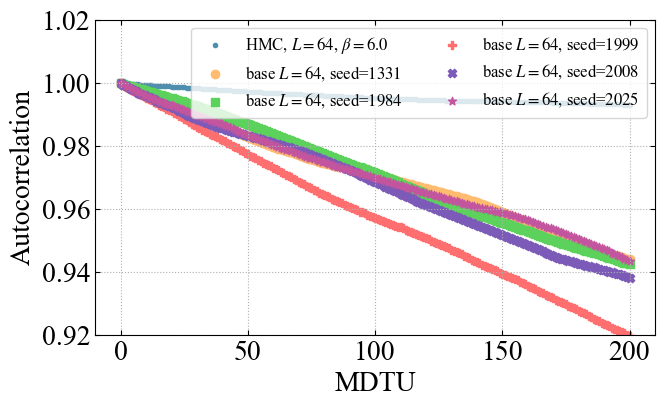

In [14]:
hmc_L64_b6_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L64_beta6.0.csv')

fthmc_base_L64_b6_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L64_beta6.0_base_train_b4.0_L64_1331.csv')
fthmc_base_L64_b6_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L64_beta6.0_base_train_b4.0_L64_1984.csv')
fthmc_base_L64_b6_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L64_beta6.0_base_train_b4.0_L64_1999.csv')
fthmc_base_L64_b6_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L64_beta6.0_base_train_b4.0_L64_2008.csv')
fthmc_base_L64_b6_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/base_evaluation/dumps/topo_fthmc_L64_beta6.0_base_train_b4.0_L64_2025.csv')

max_lag = 200
beta = 6.0
volume = 64**2

hmc_L64_b6_auto = auto_from_chi(hmc_L64_b6_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_base_L64_b6_auto_1331 = auto_from_chi(fthmc_base_L64_b6_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_1984 = auto_from_chi(fthmc_base_L64_b6_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_1999 = auto_from_chi(fthmc_base_L64_b6_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_2008 = auto_from_chi(fthmc_base_L64_b6_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_2025 = auto_from_chi(fthmc_base_L64_b6_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L64_b6_auto)), hmc_L64_b6_auto, label='HMC, $L=64$, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])

ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_1331)), fthmc_base_L64_b6_auto_1331, label='base $L=64$, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_1984)), fthmc_base_L64_b6_auto_1984, label='base $L=64$, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_1999)), fthmc_base_L64_b6_auto_1999, label='base $L=64$, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_2008)), fthmc_base_L64_b6_auto_2008, label='base $L=64$, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_2025)), fthmc_base_L64_b6_auto_2025, label='base $L=64$, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0.92, 1.02)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/base_train_b4_L64_autocorrelation_L64_b6.pdf', transparent=True)
plt.show()


In [15]:
idx = 64

gamma_hmc = 1 / (1 - hmc_L64_b6_auto[idx])

gamma_fthmc_1331 = 1 / (1 - fthmc_base_L64_b6_auto_1331[idx])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L64_b6_auto_1984[idx])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L64_b6_auto_1999[idx])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L64_b6_auto_2008[idx])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L64_b6_auto_2025[idx])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L64_b6_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])
gamma_ratio_L64_b6_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])


print(f">>> gamma ratio ({idx})")
print(f"gamma ratio ({idx}) for L64 b6: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2025}")
print(f"mean({idx}) for L64 b6: {gamma_ratio_L64_b6_mean}")
print(f"std({idx}) for L64 b6: {gamma_ratio_L64_b6_std}")

deltaQ_hmc = [ abs(hmc_L64_b6_topo[i] - hmc_L64_b6_topo[i-1]) for i in range(1, len(hmc_L64_b6_topo))]

deltaQ_fthmc_1331 = [ abs(fthmc_base_L64_b6_topo_1331[i] - fthmc_base_L64_b6_topo_1331[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L64_b6_topo_1984[i] - fthmc_base_L64_b6_topo_1984[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L64_b6_topo_1999[i] - fthmc_base_L64_b6_topo_1999[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L64_b6_topo_2008[i] - fthmc_base_L64_b6_topo_2008[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_2008))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L64_b6_topo_2025[i] - fthmc_base_L64_b6_topo_2025[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_2025))]

deltaQ_hmc_L64_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L64_b6_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L64_b6_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ for HMC L64 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L64 b6: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L64 b6: {deltaQ_fthmc_L64_b6_mean / deltaQ_hmc_L64_b6_mean}")
print(f"std(deltaQ) ratio for FTHMC L64 b6: {deltaQ_fthmc_L64_b6_std / deltaQ_hmc_L64_b6_mean}")

>>> gamma ratio (64)
gamma ratio (64) for L64 b6: 6.244318181818123, 5.109848484848432, 8.378787878787815, 5.857954545454485, 6.1022727272726724
mean(64) for L64 b6: 6.338636363636305
std(64) for L64 b6: 1.0925160460311885

>>> deltaQ
deltaQ for HMC L64 b6: 0.005860805860805861
deltaQ for FTHMC L64 b6: 0.02490842490842491, 0.01391941391941392, 0.023443223443223443, 0.021001221001221003, 0.019291819291819293
mean(deltaQ) ratio for FTHMC L64 b6: 3.5000000000000004
std(deltaQ) ratio for FTHMC L64 b6: 0.6524526377021128
